Based on emcee Quickstart documentation: https://emcee.readthedocs.io/en/stable/tutorials/quickstart/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

In [2]:
def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

In [5]:
ndim = 5

np.random.seed(42)
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

In [7]:
nwalkers = 32
p0 = np.random.rand(nwalkers, ndim) # 32 x 5 array

In [8]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

In [10]:
state = sampler.run_mcmc(p0, 100) # run 100 steps of mcmc for burn-in
sampler.reset()

In [11]:
sampler.run_mcmc(state, 10000);

In [15]:
samples = sampler.get_chain(flat=True)

In [18]:
samples.shape

(320000, 5)

Text(0.5, 1.0, 'mean = 0.3745401188473625')

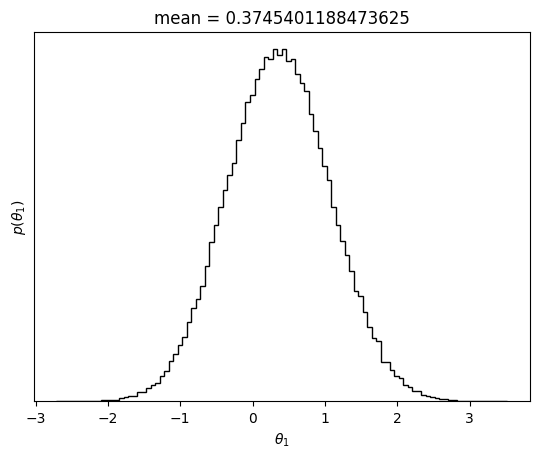

In [20]:
plt.hist(samples[:,0], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);
plt.title("mean = " + str(means[0]))

Text(0.5, 1.0, 'mean = 0.9507143064099162')

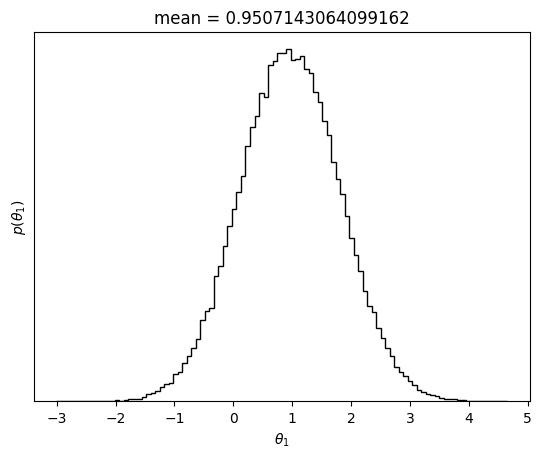

In [21]:
plt.hist(samples[:,1], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);
plt.title("mean = " + str(means[1]))

Text(0.5, 1.0, 'mean = 0.7319939418114051')

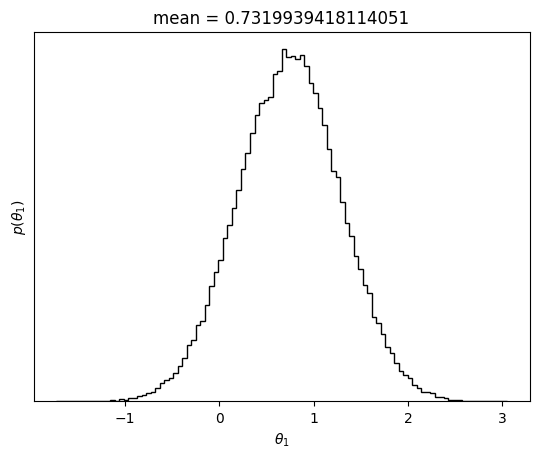

In [22]:
plt.hist(samples[:,2], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);
plt.title("mean = " + str(means[2]))

Text(0.5, 1.0, 'mean = 0.5986584841970366')

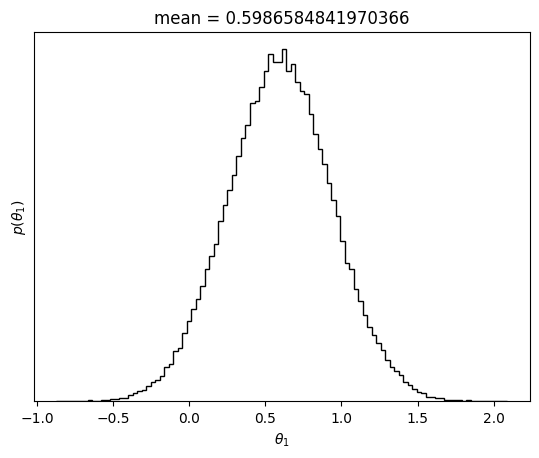

In [24]:
plt.hist(samples[:,3], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);
plt.title("mean = " + str(means[3]))

Text(0.5, 1.0, 'mean = 0.15601864044243652')

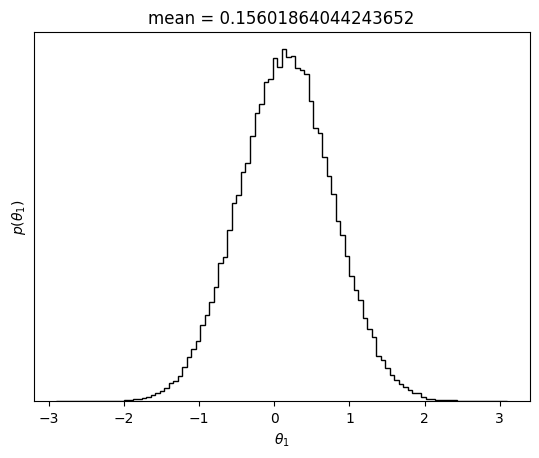

In [25]:
plt.hist(samples[:,4], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);
plt.title("mean = " + str(means[4]))

In [27]:
np.mean(sampler.acceptance_fraction)

0.553340625

In [26]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.553


In [28]:
print(
    "Mean autocorrelation time: {0:.3f} steps".format(
        np.mean(sampler.get_autocorr_time())
    )
)

Mean autocorrelation time: 55.826 steps
